In [3]:
import pandas as pd

complaints = pd.read_csv('complaints.csv')


C:\Users\Home\AppData\Local\Temp\ipykernel_4456\1172843717.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('complaints.csv')


In [4]:
len(complaints)


4992041

<Axes: xlabel='Company response to consumer'>

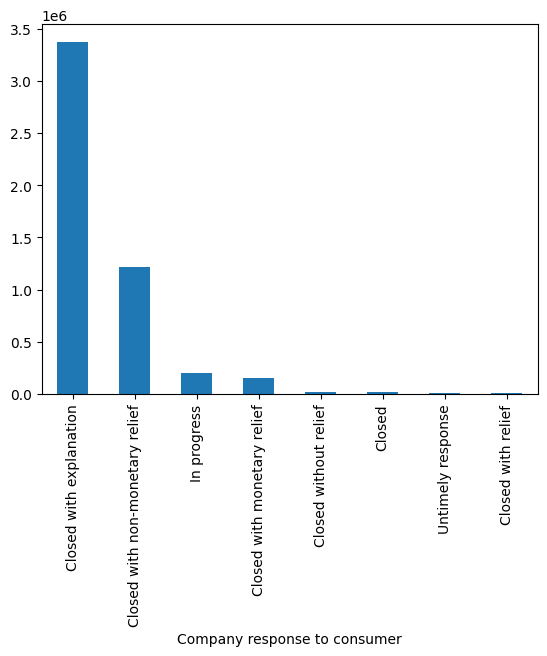

In [3]:
complaints['Company response to consumer'].unique()

complaints['Company response to consumer'].value_counts()

complaints['Company response to consumer'].value_counts().plot(kind='bar')

<Axes: xlabel='Company response to consumer'>

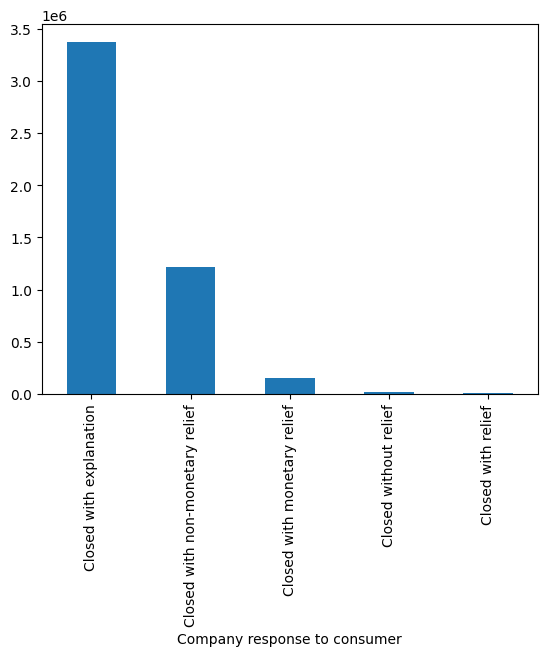

In [4]:
comps = complaints  [~complaints['Company response to consumer'].isin(['In progress', 'Closed', 'Untimely response'])]

comps['Company response to consumer'].value_counts()

comps['Company response to consumer'].value_counts().plot(kind='bar')

In [5]:
comps['Relief'] = comps['Company response to consumer'].isin(['Closed with monetary relief', 
                                                            'Closed with non-monetary relief', 
                                                            'Closed with relief']).astype(int)

comps['Relief'].value_counts()


C:\Users\Home\AppData\Local\Temp\ipykernel_4456\1019823580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['Relief'] = comps['Company response to consumer'].isin(['Closed with monetary relief',


Relief
0    3392096
1    1371345
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features (you may want to adjust these based on your data)
# First, let's see what columns we have to work with
print("Available columns:", comps.columns.tolist())

# For this example, we'll use 'Product' and 'Issue' as features
# We need to convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(comps[['Product', 'Issue']])
y = comps['Relief']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Available columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Relief']

Accuracy: 0.7316406508314885

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83    679171
           1       0.57      0.26      0.36    273518

    accuracy                           0.73    952689
   macro avg       0.66      0.59      0.60    952689
weighted avg       0.70      0.73      0.70    952689



In [13]:
X = pd.get_dummies(comps[['Product', 'Issue', 'State', 'Submitted via']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7314086758637919

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83    679171
           1       0.57      0.26      0.36    273518

    accuracy                           0.73    952689
   macro avg       0.66      0.59      0.59    952689
weighted avg       0.70      0.73      0.69    952689



In [14]:
X = pd.get_dummies(comps[['Product', 'Issue', 'Submitted via']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7318022985465351

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83    679171
           1       0.57      0.26      0.36    273518

    accuracy                           0.73    952689
   macro avg       0.66      0.59      0.60    952689
weighted avg       0.70      0.73      0.70    952689



In [51]:
X = pd.get_dummies(comps[['Product', 'Issue', 'Submitted via', 'Sub-issue']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7331616088776085

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83    679171
           1       0.59      0.24      0.34    273518

    accuracy                           0.73    952689
   macro avg       0.67      0.59      0.59    952689
weighted avg       0.70      0.73      0.69    952689



In [19]:
X = pd.get_dummies(comps[['Issue', 'Submitted via', 'Sub-issue']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7177169044672501

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83    679171
           1       0.58      0.06      0.11    273518

    accuracy                           0.72    952689
   macro avg       0.65      0.52      0.47    952689
weighted avg       0.68      0.72      0.62    952689



In [20]:
X = pd.get_dummies(comps[['Product', 'Submitted via', 'Sub-issue']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7328792502065207

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83    679171
           1       0.59      0.24      0.34    273518

    accuracy                           0.73    952689
   macro avg       0.67      0.58      0.59    952689
weighted avg       0.70      0.73      0.69    952689



In [22]:
comps['ZIP_region'] = comps['ZIP code'].str[:3]

C:\Users\Home\AppData\Local\Temp\ipykernel_32348\2360012803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['ZIP_region'] = comps['ZIP code'].str[:3]


In [23]:
X = pd.get_dummies(comps[['Product', 'Issue', 'Submitted via', 'Sub-issue', 'ZIP_region']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7267880703986296

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83    679171
           1       0.55      0.25      0.35    273518

    accuracy                           0.73    952689
   macro avg       0.65      0.59      0.59    952689
weighted avg       0.70      0.73      0.69    952689



In [6]:
import requests

HOST = 'https://api.census.gov/data'
year = '2023'
dataset = 'acs/acs5' # American Community Survey 5-Year Estimates
base_url = '/'.join([HOST, year, dataset])

get_vars = [
    'B19013_001E', # Median household income in the past 12 months (in 2023 inflation-adjusted dollars)
    'B05012_003E', # Estimate total foreign-born population
    'C16001_002E', # Estimate total speak only English at home
    'C16001_003E', # Estimate total speak Spanish at home
    'C16001_004E', # Estimate total speak Spanish at home and English 'very well'
    'C16001_005E', # Estimate total speak Spanish at home and English less than 'very well'
    'C16001_006E', # Estimate total speak French, Haitian, or Cajun at home
    'C16001_007E', # Estimate total speak French, Haitian, or Cajun at home and English 'very well'
    'C16001_008E', # Estimate total speak French, Haitian, or Cajun at home and English less than 'very well'
    'C16001_009E', # Estimate total speak German or othe West Germanic languages at home
    'C16001_010E', # Estimate total speak German or othe West Germanic languages at home and English 'very well'
    'C16001_011E', # Estimate total speak German or othe West Germanic languages at home and English less than 'very well'
    'C16001_012E', # Estimate total speak Russian, Polish, or other Slavic languages at home
    'C16001_013E', # Estimate total speak Russian, Polish, or other Slavic languages at home and English 'very well'
    'C16001_014E', # Estimate total speak Russian, Polish, or other Slavic languages at home and English less than 'very well'
    'C16001_015E', # Estimate total speak Other Indo-European languages at home
    'C16001_016E', # Estimate total speak Other Indo-European languages at home and English 'very well'
    'C16001_017E', # Estimate total speak Other Indo-European languages at home and English less than 'very well'
    'C16001_018E', # Estimate total speak Korean at home
    'C16001_019E', # Estimate total speak Korean at home and English 'very well'
    'C16001_020E', # Estimate total speak Korean at home and English less than 'very well'
    'C16001_021E', # Estimate total speak Chinese at home
    'C16001_022E', # Estimate total speak Chinese at home and English 'very well'
    'C16001_023E', # Estimate total speak Chinese at home and English less than 'very well'
    'C16001_024E', # Estimate total speak Vietnamese at home
    'C16001_025E', # Estimate total speak Vietnamese at home and English 'very well'
    'C16001_026E', # Estimate total speak Vietnamese at home and English less than 'very well'
    'C16001_027E', # Estimate total speak Tagalog at home
    'C16001_028E', # Estimate total speak Tagalog at home and English 'very well'
    'C16001_029E', # Estimate total speak Tagalog at home and English less than 'very well'
    'C16001_030E', # Estimate total speak Other Asian and Pacific Island languages at home
    'C16001_031E', # Estimate total speak Other Asian and Pacific Island languages at home and English 'very well'
    'C16001_032E', # Estimate total speak Other Asian and Pacific Island languages at home and English less than 'very well'
    'C16001_033E', # Estimate total speak Arabic at home
    'C16001_034E', # Estimate total speak Arabic at home and English 'very well'
    'C16001_035E', # Estimate total speak Arabic at home and English less than 'very well'
    'C16001_036E', # Estimate total speak Other and unspecified languages at home
    'C16001_037E', # Estimate total speak Other and unspecified languages at home and English 'very well'
    'C16001_038E', # Estimate total speak Other and unspecified languages at home and English less than 'very well'
    'B01003_001E' # Estimate total population
]
predicates = {}
predicates['get'] = ",".join(get_vars)
predicates['for'] = 'zip code tabulation area:*'

r = requests.get(base_url, params=predicates)

In [7]:
col_names = [
    'median_household_income',
    'foreign_born_population',
    'speak_only_english',
    'speak_spanish',
    'speak_spanish_very_well',
    'speak_spanish_less_than_very_well',
    'speak_french_haitian_or_cajun',
    'speak_french_haitian_or_cajun_very_well',
    'speak_french_haitian_or_cajun_less_than_very_well',
    'speak_german_or_other_west_germanic_languages',
    'speak_german_or_other_west_germanic_languages_very_well',
    'speak_german_or_other_west_germanic_languages_less_than_very_well',
    'speak_russian_polish_or_other_slavic_languages',
    'speak_russian_polish_or_other_slavic_languages_very_well',
    'speak_russian_polish_or_other_slavic_languages_less_than_very_well',
    'speak_other_indo_european_languages',
    'speak_other_indo_european_languages_very_well',
    'speak_other_indo_european_languages_less_than_very_well',
    'speak_korean',
    'speak_korean_very_well',
    'speak_korean_less_than_very_well',
    'speak_chinese',
    'speak_chinese_very_well',
    'speak_chinese_less_than_very_well',
    'speak_vietnamese',
    'speak_vietnamese_very_well',
    'speak_vietnamese_less_than_very_well',
    'speak_tagalog',
    'speak_tagalog_very_well',
    'speak_tagalog_less_than_very_well',
    'speak_other_asian_and_pacific_island_languages',
    'speak_other_asian_and_pacific_island_languages_very_well',
    'speak_other_asian_and_pacific_island_languages_less_than_very_well',
    'speak_arabic',
    'speak_arabic_very_well',
    'speak_arabic_less_than_very_well',
    'speak_other_and_unspecified_languages',
    'speak_other_and_unspecified_languages_very_well',
    'speak_other_and_unspecified_languages_less_than_very_well',
    'population',
    'zip'
]

acs_data = pd.DataFrame(data=r.json()[1:], columns=col_names)

print(acs_data.head())

  median_household_income foreign_born_population speak_only_english  \
0                   71924                    1746              12628   
1                   69411                    3792              19283   
2              -666666666                    1921               9322   
3                   97390                     129               4569   
4                   99056                     758              13149   

  speak_spanish speak_spanish_very_well speak_spanish_less_than_very_well  \
0           559                     289                               270   
1          1365                    1015                               350   
2           448                     437                                11   
3            23                       1                                22   
4           576                     564                                12   

  speak_french_haitian_or_cajun speak_french_haitian_or_cajun_very_well  \
0                           3

In [ ]:
acs_data

In [15]:
acs_data.columns

Index(['median_household_income', 'foreign_born_population',
       'speak_only_english', 'speak_spanish', 'speak_spanish_very_well',
       'speak_spanish_less_than_very_well', 'speak_french_haitian_or_cajun',
       'speak_french_haitian_or_cajun_very_well',
       'speak_french_haitian_or_cajun_less_than_very_well',
       'speak_german_or_other_west_germanic_languages',
       'speak_german_or_other_west_germanic_languages_very_well',
       'speak_german_or_other_west_germanic_languages_less_than_very_well',
       'speak_russian_polish_or_other_slavic_languages',
       'speak_russian_polish_or_other_slavic_languages_very_well',
       'speak_russian_polish_or_other_slavic_languages_less_than_very_well',
       'speak_other_indo_european_languages',
       'speak_other_indo_european_languages_very_well',
       'speak_other_indo_european_languages_less_than_very_well',
       'speak_korean', 'speak_korean_very_well',
       'speak_korean_less_than_very_well', 'speak_chinese',
   

In [8]:
# Convert all columns to numeric, replacing any non-numeric values with NaN
for col in acs_data.columns:
    acs_data[col] = pd.to_numeric(acs_data[col], errors='coerce')

# Assuming acs_data has columns like 'median_income', 'foreign_born', 'population', etc.
# First, identify columns to normalize (excluding population and any non-numeric columns)
columns_to_normalize = ['foreign_born_population',
       'speak_only_english', 'speak_spanish', 'speak_spanish_very_well',
       'speak_spanish_less_than_very_well', 'speak_french_haitian_or_cajun',
       'speak_french_haitian_or_cajun_very_well',
       'speak_french_haitian_or_cajun_less_than_very_well',
       'speak_german_or_other_west_germanic_languages',
       'speak_german_or_other_west_germanic_languages_very_well',
       'speak_german_or_other_west_germanic_languages_less_than_very_well',
       'speak_russian_polish_or_other_slavic_languages',
       'speak_russian_polish_or_other_slavic_languages_very_well',
       'speak_russian_polish_or_other_slavic_languages_less_than_very_well',
       'speak_other_indo_european_languages',
       'speak_other_indo_european_languages_very_well',
       'speak_other_indo_european_languages_less_than_very_well',
       'speak_korean', 'speak_korean_very_well',
       'speak_korean_less_than_very_well', 'speak_chinese',
       'speak_chinese_very_well', 'speak_chinese_less_than_very_well',
       'speak_vietnamese', 'speak_vietnamese_very_well',
       'speak_vietnamese_less_than_very_well', 'speak_tagalog',
       'speak_tagalog_very_well', 'speak_tagalog_less_than_very_well',
       'speak_other_asian_and_pacific_island_languages',
       'speak_other_asian_and_pacific_island_languages_very_well',
       'speak_other_asian_and_pacific_island_languages_less_than_very_well',
       'speak_arabic', 'speak_arabic_very_well',
       'speak_arabic_less_than_very_well',
       'speak_other_and_unspecified_languages',
       'speak_other_and_unspecified_languages_very_well',
       'speak_other_and_unspecified_languages_less_than_very_well']  # adjust these based on your actual columns

# Create new normalized columns
for col in columns_to_normalize:
    new_col_name = f'{col}_per_capita'
    acs_data[new_col_name] = acs_data[col] / acs_data['population']

# Show the results
print("Original vs Normalized values:")
print(acs_data[['population'] + columns_to_normalize + 
      [col + '_per_capita' for col in columns_to_normalize]].head())

Original vs Normalized values:
   population  foreign_born_population  speak_only_english  speak_spanish  \
0       16136                   1746.0               12628            559   
1       24726                   3792.0               19283           1365   
2       12458                   1921.0                9322            448   
3        4786                    129.0                4569             23   
4       15406                    758.0               13149            576   

   speak_spanish_very_well  speak_spanish_less_than_very_well  \
0                      289                                270   
1                     1015                                350   
2                      437                                 11   
3                        1                                 22   
4                      564                                 12   

   speak_french_haitian_or_cajun  speak_french_haitian_or_cajun_very_well  \
0                            327      

In [9]:
comps['ZIP code'] = pd.to_numeric(comps['ZIP code'], errors='coerce')
comps_merged = pd.merge(comps, acs_data, left_on='ZIP code', right_on='zip', how='left', validate='m:1')


C:\Users\Home\AppData\Local\Temp\ipykernel_4456\650094448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['ZIP code'] = pd.to_numeric(comps['ZIP code'], errors='coerce')


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X = pd.get_dummies(comps_merged[['Product', 'Issue', 'Submitted via', 'Sub-issue', 'speak_chinese_less_than_very_well',
                                 'speak_korean_less_than_very_well']])
y = comps_merged['Relief']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Show top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.tail(10))


Accuracy: 0.7174964757649138

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82    679171
           1       0.52      0.26      0.34    273518

    accuracy                           0.72    952689
   macro avg       0.63      0.58      0.58    952689
weighted avg       0.68      0.72      0.68    952689


Top 10 Most Important Features:
                                               feature  importance
107         Issue_Lender damaged or destroyed property         0.0
103           Issue_Issue where my lender is my school         0.0
161   Issue_Property was damaged or destroyed property         0.0
341   Sub-issue_Issues with fees connected to the loan         0.0
281  Sub-issue_Dealing with provider of income shar...         0.0
190                              Issue_Unexpected fees         0.0
337                          Sub-issue_Insurance terms         0.0
326              Sub-issue_Improper use of your re

In [22]:
print(feature_importance.tail(10))

                                               feature    importance
23                            Product_Virtual currency  2.071790e-06
105            Issue_Issue with income share agreement  9.797128e-07
160               Issue_Problems receiving the advance  7.934472e-07
151                    Issue_Problem with an overdraft  4.679225e-07
198  Issue_Was approved for a loan, but didn't rece...  1.563542e-07
111                     Issue_Lender sold the property  8.416282e-08
163                            Issue_Property was sold  2.950344e-08
117                        Issue_Lost or stolen refund  0.000000e+00
108         Issue_Lender damaged or destroyed property  0.000000e+00
104           Issue_Issue where my lender is my school  0.000000e+00


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X = pd.get_dummies(comps_merged[['Product', 'Submitted via', 'ZIP code', 
                                 'speak_only_english', 'foreign_born_population']])
y = comps_merged['Relief']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Show top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.tail(10))


Accuracy: 0.721261607932914

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82    679171
           1       0.53      0.25      0.34    273518

    accuracy                           0.72    952689
   macro avg       0.64      0.58      0.58    952689
weighted avg       0.69      0.72      0.69    952689


Top 10 Most Important Features:
                                              feature  importance
3                     Product_Bank account or service    0.001416
19  Product_Payday loan, title loan, personal loan...    0.001076
17                                Product_Payday loan    0.001068
20                               Product_Prepaid card    0.000785
14                            Product_Money transfers    0.000442
30                         Submitted via_Web Referral    0.000363
16                    Product_Other financial service    0.000215
24                                Submitted via_Email    0.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X = pd.get_dummies(comps_merged[['Product', 'ZIP code', 'speak_spanish_less_than_very_well_per_capita',
                                 'speak_only_english_per_capita', 'foreign_born_population_per_capita',
                                 'median_household_income']])
y = comps_merged['Relief']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Show top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.tail(10))


Accuracy: 0.7251579476618287

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83    679171
           1       0.55      0.24      0.34    273518

    accuracy                           0.73    952689
   macro avg       0.65      0.58      0.58    952689
weighted avg       0.69      0.73      0.69    952689


Top 10 Most Important Features:
                                              feature  importance
9                 Product_Credit card or prepaid card    0.002644
5                     Product_Bank account or service    0.002607
10                           Product_Credit reporting    0.002476
21  Product_Payday loan, title loan, personal loan...    0.001300
19                                Product_Payday loan    0.001291
22                               Product_Prepaid card    0.000948
16                            Product_Money transfers    0.000534
18                    Product_Other financial service    0

In [60]:
X = pd.get_dummies(comps[['Product', 'Issue', 'Submitted via', 'Sub-issue']])
y = comps['Relief']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7331616088776085

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83    679171
           1       0.59      0.24      0.34    273518

    accuracy                           0.73    952689
   macro avg       0.67      0.59      0.59    952689
weighted avg       0.70      0.73      0.69    952689



In [61]:
print(feature_importance.tail(10))

                                               feature  importance
0                    speak_chinese_less_than_very_well    0.273517
8    Product_Credit reporting or other personal con...    0.252984
1                     speak_korean_less_than_very_well    0.208206
9    Product_Credit reporting, credit repair servic...    0.067271
14                                    Product_Mortgage    0.020456
10                             Product_Debt collection    0.015080
98                   Issue_Improper use of your report    0.011963
206                                  Submitted via_Web    0.009546
5                                  Product_Credit card    0.007819
332      Sub-issue_Information belongs to someone else    0.007225


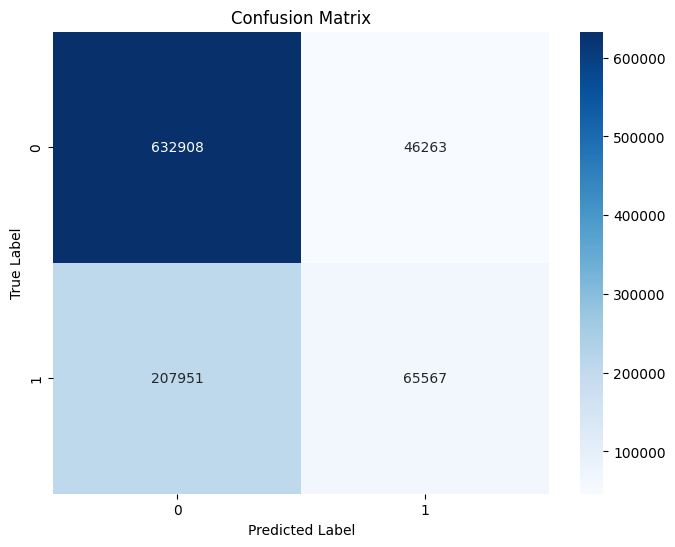

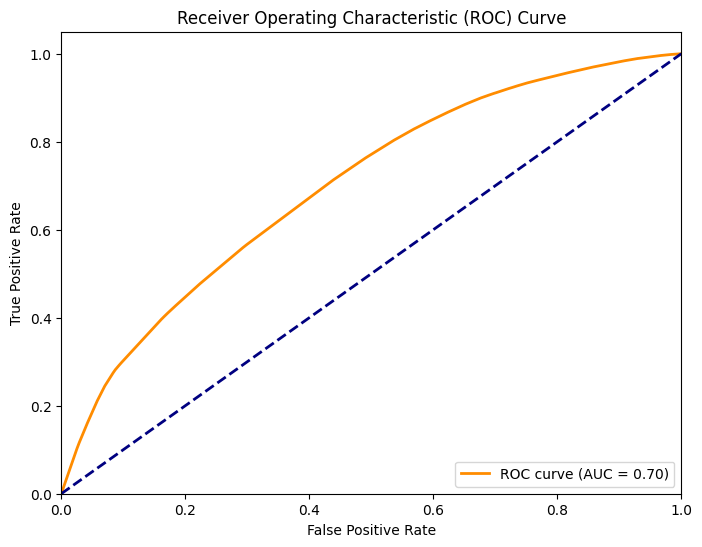

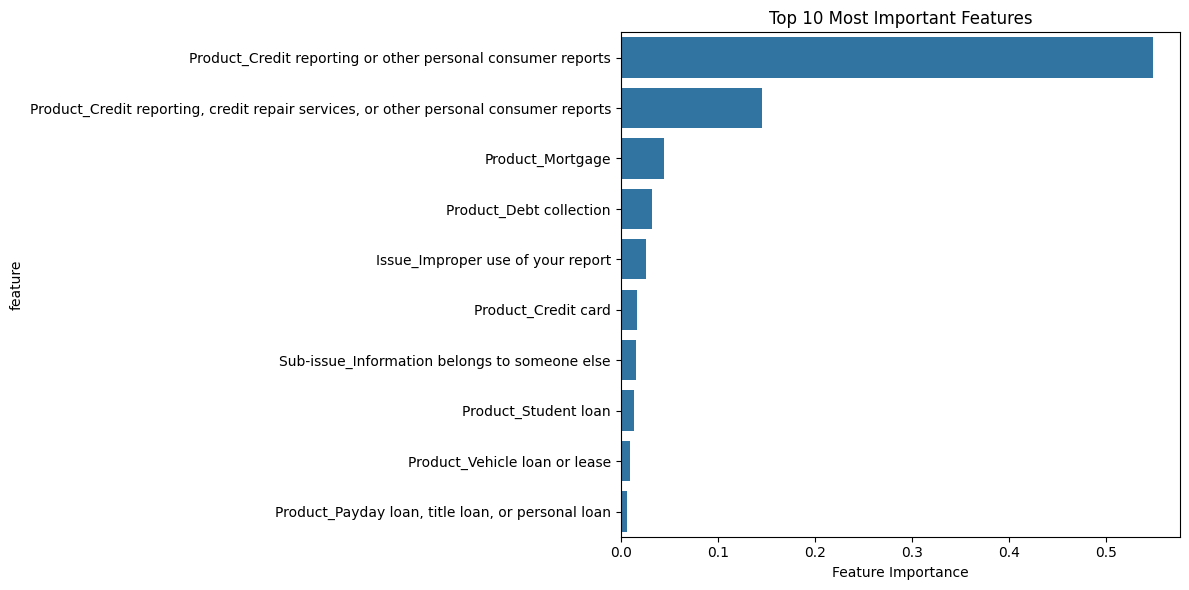

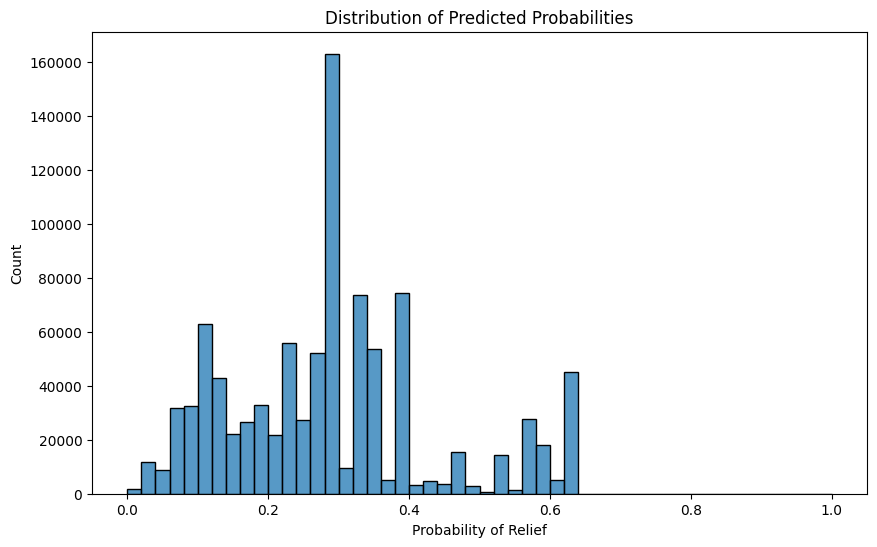

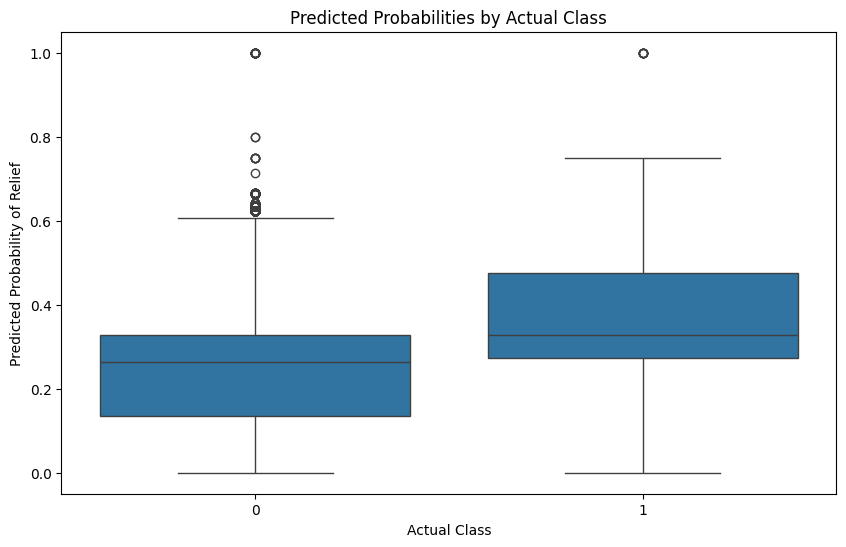

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. ROC Curve
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Feature Importance Plot
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# 4. Prediction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({'Predicted Probabilities': y_pred_proba}), 
             x='Predicted Probabilities', bins=50)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Relief')
plt.ylabel('Count')
plt.show()

# 5. Actual vs Predicted
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Actual', y='Probability', data=results_df)
plt.title('Predicted Probabilities by Actual Class')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Probability of Relief')
plt.show()

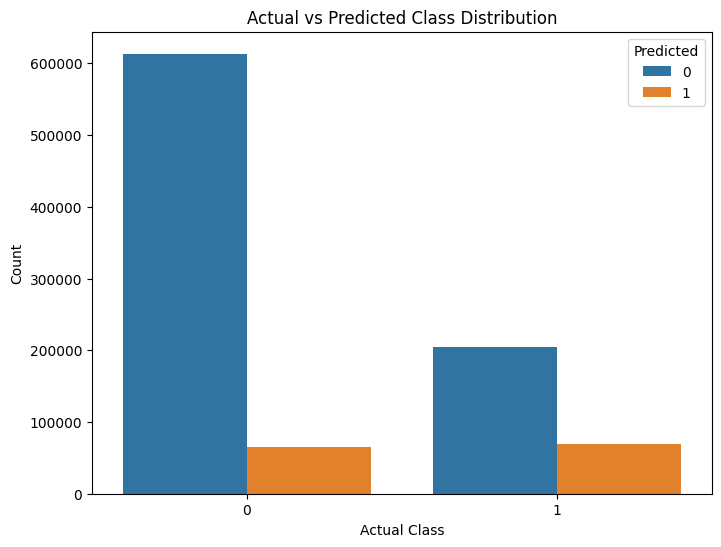

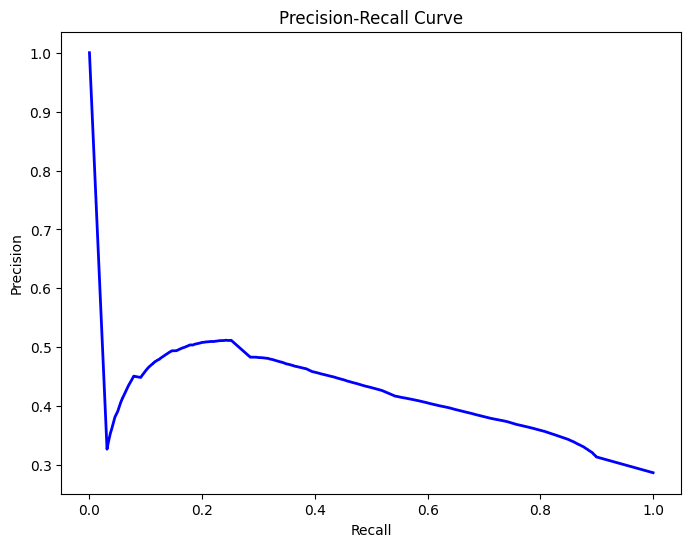

In [50]:
# 6. Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}),
              x='Actual', hue='Predicted')
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.show()

# 7. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Prepare the data
X = pd.get_dummies(comps_merged[['Product', 'Issue', 'Submitted via', 'Sub-issue', 'ZIP code']])
y = comps_merged['Relief']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=10,
                   random_state=42,
                   verbose=True)

mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Print results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
len(comps_merged[comps_merged['ZIP code'].isna()])/len(comps_merged)


0.11286840752304898

In [16]:
len(comps_merged[comps_merged['median_household_income'].isna()])/len(comps_merged)


0.12341561488848082

In [20]:
len(comps_merged[comps_merged['foreign_born_population_per_capita'].isna()])/len(comps_merged)

0.002399200298499027

In [23]:
len(comps_merged[comps_merged['speak_only_english'].isna()])/len(comps_merged)

0.0

In [21]:
comps_merged.dropna(subset=['ZIP code', 'median_household_income', 'foreign_born_population_per_capita'], inplace=True)


Iteration 1, loss = 0.56459354
Iteration 2, loss = 0.55431000
Iteration 3, loss = 0.55266636
Iteration 4, loss = 0.55167824
Iteration 5, loss = 0.55131850
Iteration 6, loss = 0.55075999
Iteration 7, loss = 0.55019118
Iteration 8, loss = 0.54995087
Iteration 9, loss = 0.54945603
Iteration 10, loss = 0.54934004

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83     14139
         1.0       0.58      0.25      0.35      5861

    accuracy                           0.73     20000
   macro avg       0.67      0.59      0.59     20000
weighted avg       0.70      0.73      0.69     20000



C:\Users\Home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


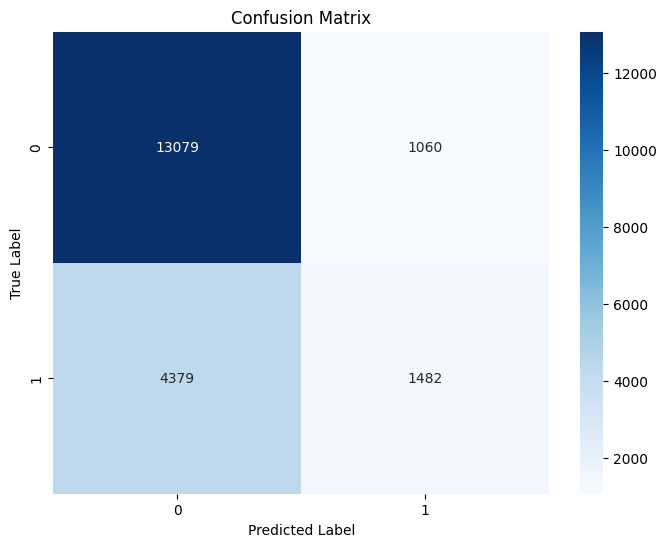

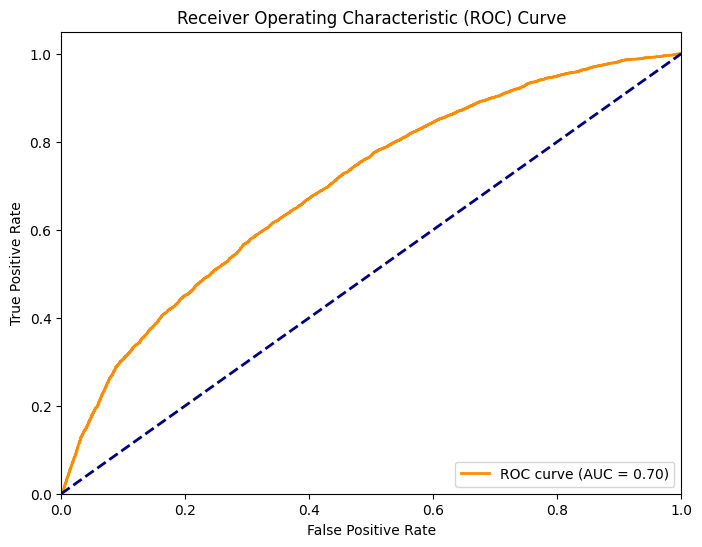

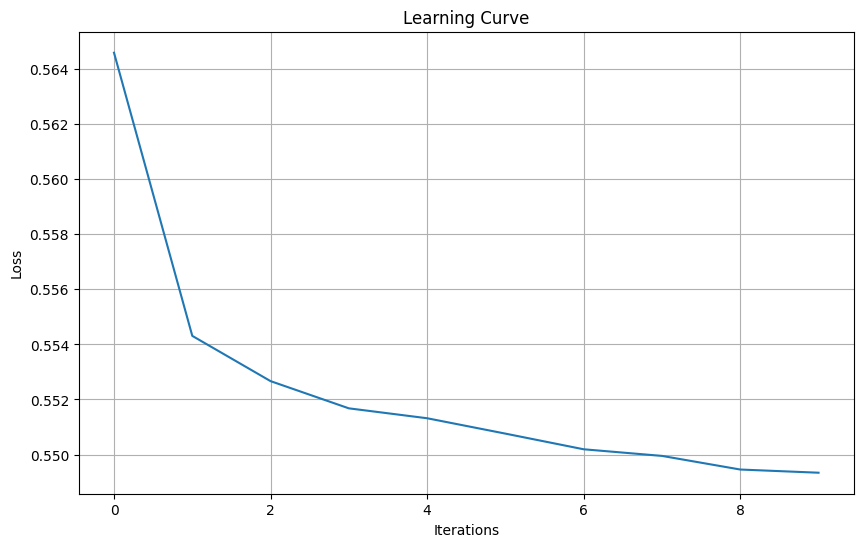

In [28]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Take a smaller sample of the data (e.g., 100,000 rows)
sample_size = 100000
sampled_indices = np.random.choice(len(comps_merged), sample_size, replace=False)
comps_sample = comps_merged.iloc[sampled_indices]

# Select fewer features and convert to efficient dtypes
selected_features = ['Product', 'Issue', 'Submitted via', 'Sub-issue', 
                     'median_household_income', 
                     #'foreign_born_population_per_capita', 
                     'speak_only_english']
X = pd.get_dummies(comps_sample[selected_features], dtype=np.float32)  # Use float32 instead of float64
y = comps_sample['Relief'].astype(np.float32)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a smaller model
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),  # Smaller architecture
    activation='relu',
    solver='adam',
    max_iter=10,
    batch_size=32,  # Use mini-batches
    random_state=42,
    verbose=True
)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)
y_pred_proba = mlp.predict_proba(X_test_scaled)

# Print results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()